In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [83]:
df=pd.read_csv('bankloans.csv')

# Exploratory Data Analysis

In [84]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [85]:
df.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN
1149,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


In [117]:
df.isnull().any()

age         False
ed          False
employ      False
address     False
income      False
debtinc     False
creddebt    False
othdebt     False
default      True
dtype: bool

In [118]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [119]:
df.shape

(1150, 9)

In [120]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [121]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Name: count, Length: 700, dtype: int64

In [122]:
#converting the default column fro float to int 
#df['default']=df['default'].fillna(0.0).astype(float)

In [142]:
df.dropna(inplace=True)

In [143]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

<Axes: xlabel='age', ylabel='income'>

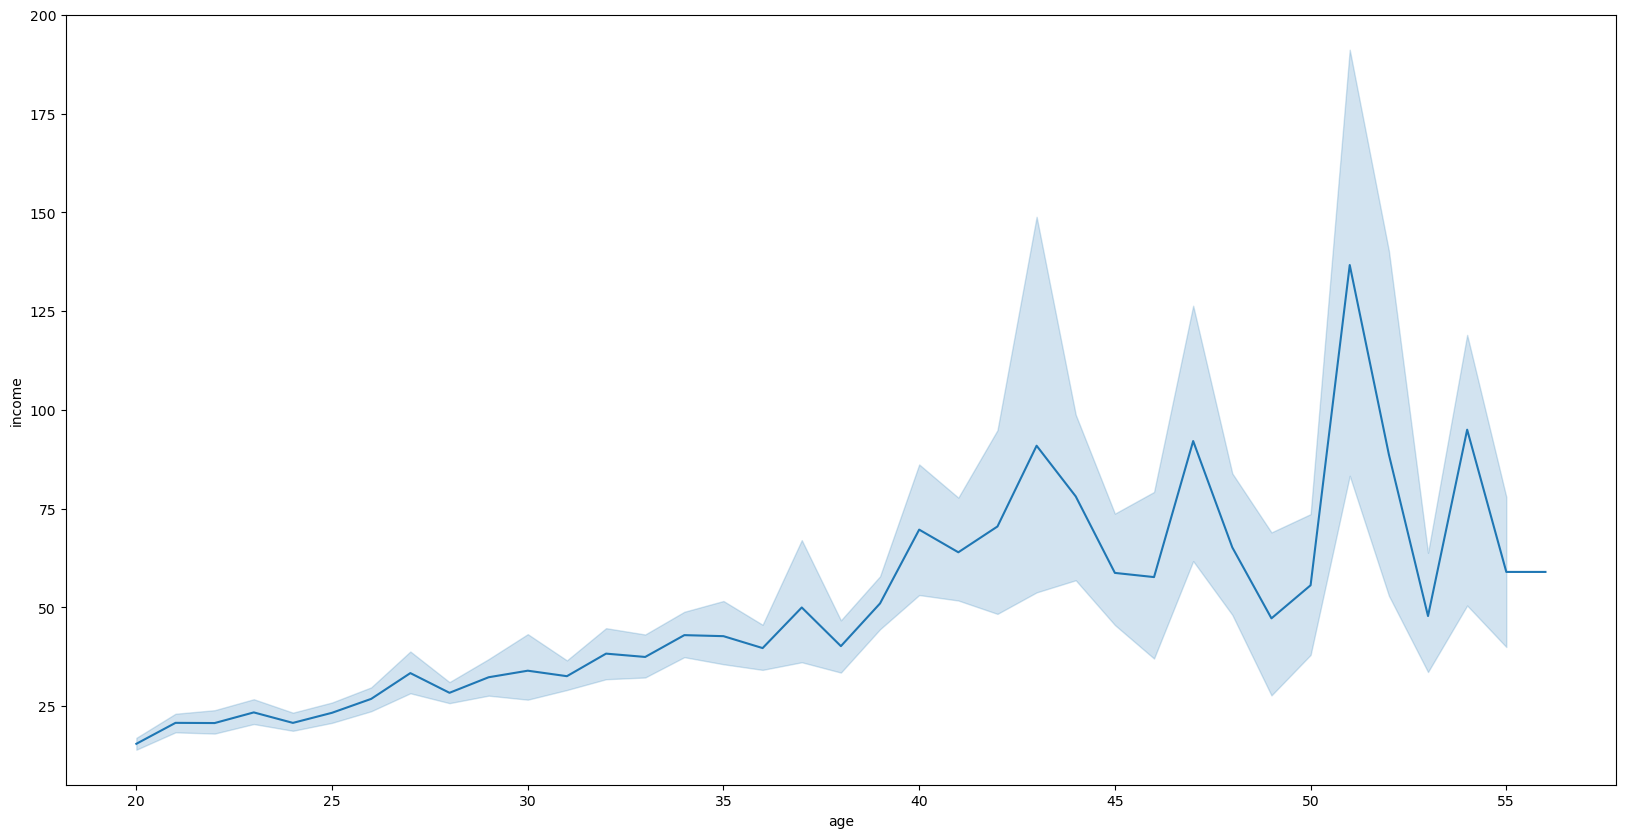

In [144]:
#Income Trends Across Age Groups

fig,ax = plt.subplots(figsize = (20,10))
sns.lineplot(x = 'age', y = 'income', data = df)

1) the lines increase with age, it suggests that income generally rises as people get older (which is common due to career growth).
2) the ines remain constant, income does not vary much by age.
3) the lines drop after a certain age, it may indicate that income peaks at a certain age and then declines (possibly due to retirement).

<Axes: xlabel='age', ylabel='debtinc'>

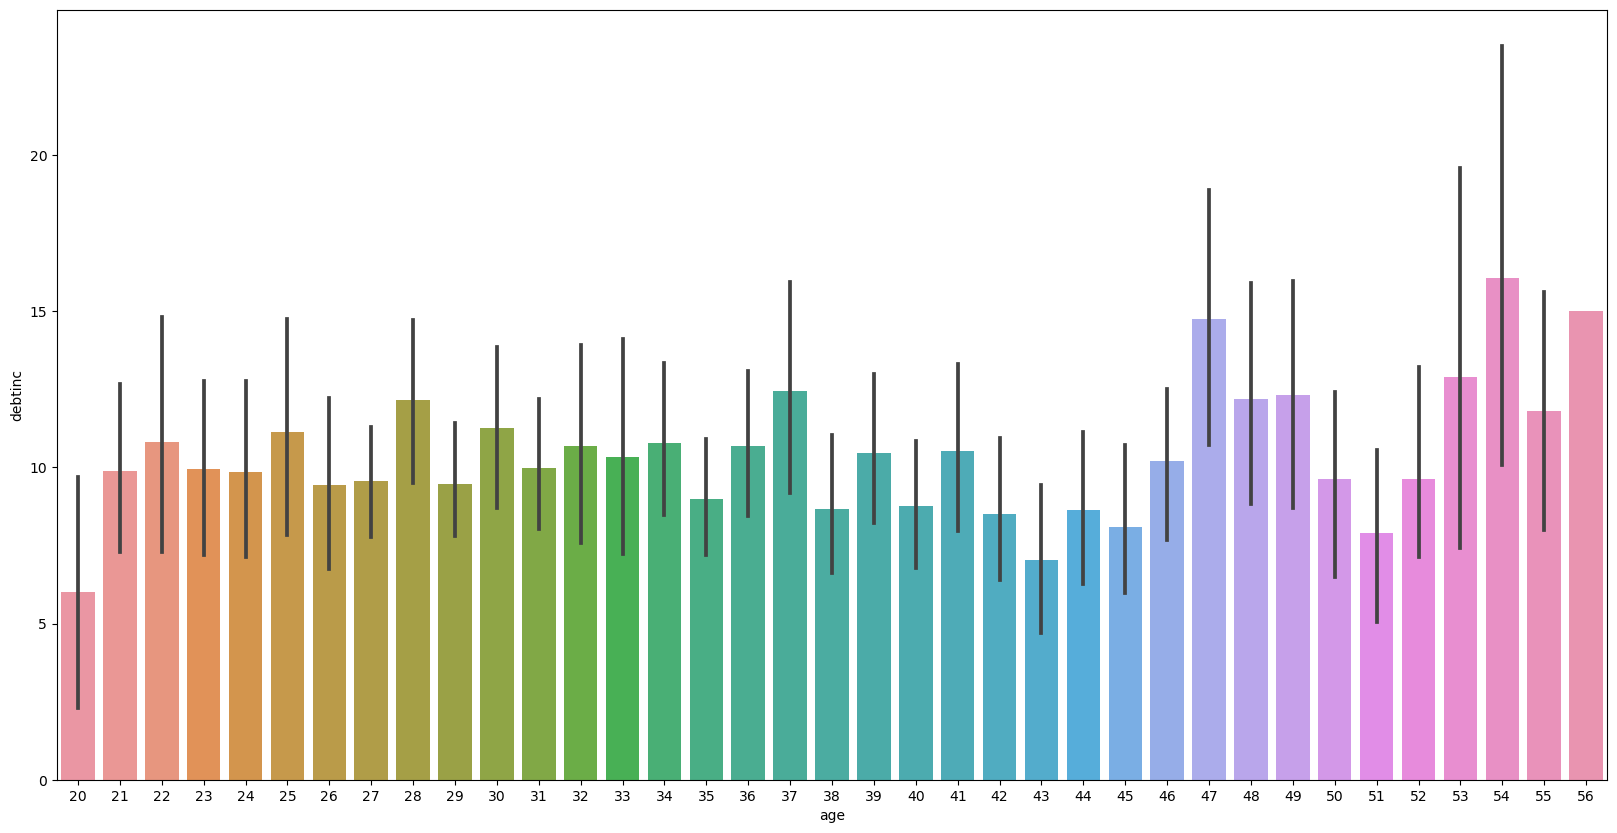

In [145]:
#Debt-to-Income Ratio Trends by Age

fig,ax = plt.subplots(figsize = (20,10))
sns.barplot(x = 'age', y = 'debtinc', data = df)

1.when the bar increases with age → Older individuals tend to have a higher debt burden relative to income.
2.when the bar decreases with age → Younger individuals have a higher debt burden compared to their income, and it reduces with age (possibly due to financial stability or paying off loans).

<Axes: xlabel='default', ylabel='count'>

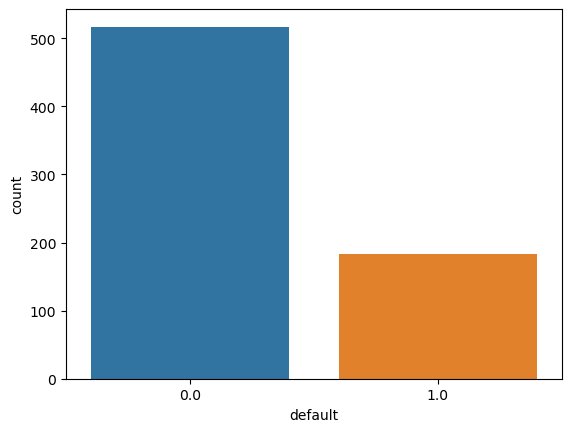

In [146]:
sns.countplot(x="default", data=df)

person defaulted on a loan (1.0 = Yes, 0.0 = No).

In [147]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

if you find we have a huge difference between no of 0.0 and 1.0 so obiously if we fit this dataset to our ml model it ll be biased as 80% of it is 0.0 so in that sitution try to resample the data or undersample the data this is more or overssample the data that is less.

In [148]:
#from sklearn.utils import resample


# Separate majority and minority classes
#df_majority = df[df['default'] == 0.0]  # Class 0 (918 samples)
#df_minority = df[df['default'] == 1.0]  # Class 1 (183 samples)

# Undersample the majority class (reduce to match the minority class size)
#df_majority_undersampled = resample(df_majority, replace=False,    # No replacement (random sampling)
                                    #n_samples=len(df_minority),  # Match minority class size
                                    #random_state=42)  # Reproducibility
# Combine minority class with undersampled majority class
#df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Shuffle dataset
#df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
#print(df_balanced['default'].value_counts())

# Training and Testing of the Model 

In [149]:
#splitting the dataset into target and features
X = df.drop(columns='default', axis=1) #every column excepts our default
Y = df['default']
     

In [150]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=45)

In [151]:
#standardizing the train and testing value for a better result of machine learning model
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.fit_transform(X_test)

# Model selection

In [152]:
#RandomForest_Classifier
from sklearn.ensemble import RandomForestClassifier

In [153]:
rfc=RandomForestClassifier(n_estimators=200)

In [154]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [155]:
rfc.score(X_test,Y_test)

0.819047619047619

In [160]:
rfc2=cross_val_score(estimator=rfc,X=X_test,y=Y_test,cv=10)
rfc2.mean()

0.8238095238095238

In [161]:
#SVM
from sklearn.svm import SVC

In [162]:
sv=SVC()
sv.fit(X_train,Y_train)

SVC()

In [163]:
sv.score(X_test,Y_test)

0.8047619047619048

In [164]:
#logistic_Regression

In [166]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [168]:
lr.score(X_test,Y_test)

0.819047619047619

<Axes: >

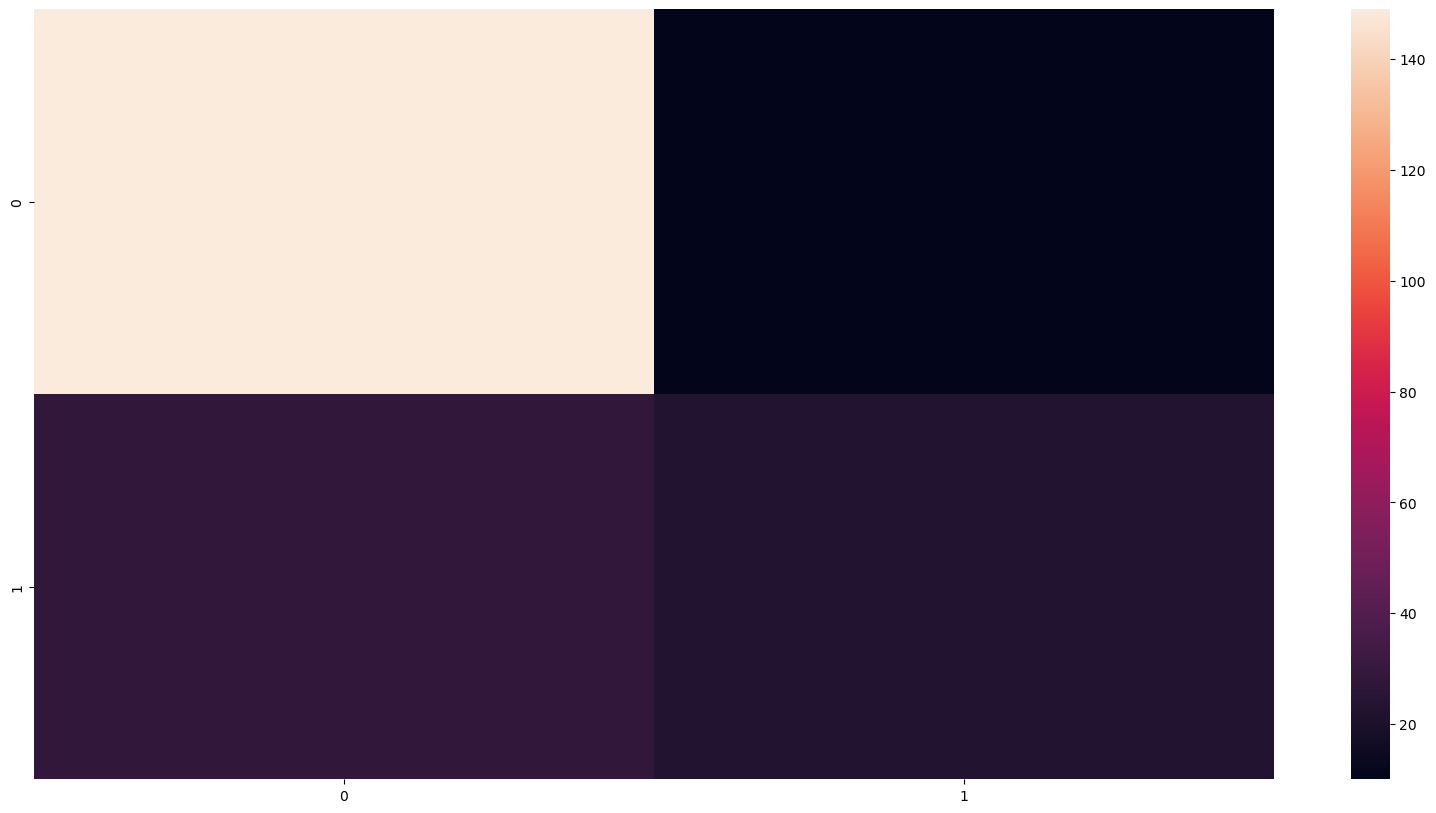

In [175]:
yp=lr.predict(X_test)
c=confusion_matrix(Y_test,yp)


fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(c)

more lighter means more accurate .

we found that Random Forest and Logistic regression works very well for our data.